In [1]:
import scipy as scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants, optimize
from scipy import stats

In [2]:
constants.physical_constants["Newtonian constant of gravitation"]
    

(6.6743e-11, 'm^3 kg^-1 s^-2', 1.5e-15)

In [ ]:
x = np.linspace(0, 100, 100)
y = 3 * x + 4 + np.random.rand(len(x)) * 20
plt.scatter(x, y)

In [ ]:
def model(x, m, c):
    return m * x + c

In [ ]:
popt, pcov = optimize.curve_fit(model, x, y)
m, c = popt
fig, ax = plt.subplots(1)
ax.scatter(x, y)
ax.plot(x, model(x, m, c), color='r')


In [ ]:
def objective(x):
    return x ** 2 + 10 * np.sin(x)
x = np.linspace(-10, 10, 1000)
plt.plot(x, objective(x))


In [ ]:
optimize.minimize(objective, 0, method='BFGS')

In [ ]:
x=np.linspace(0, 100, 1000)
y=3 * x + 5 + np.random.rand() * 2
stats.linregress(x, y)

In [21]:
from scipy.integrate import quad

def f(x):
    return 3 * np.sin(x*2)

result, error = quad(f, 1, 10)

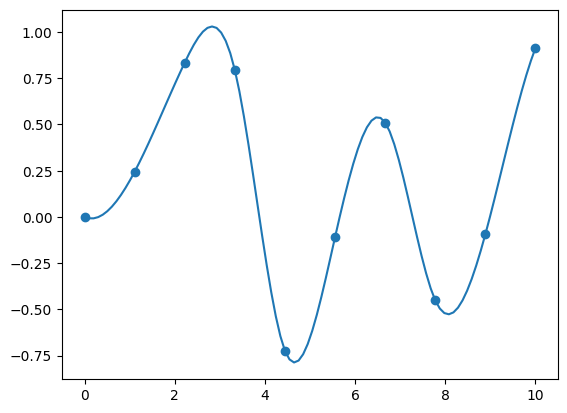

In [35]:
from scipy.interpolate import interp1d
x = np.linspace(0, 10, 10)
y = np.sin(x**2 / 5.0)
plt.scatter(x, y)
f = interp1d(x, y, kind="cubic")
x = np.linspace(0, 10, 100)
plt.plot(x, f(x))

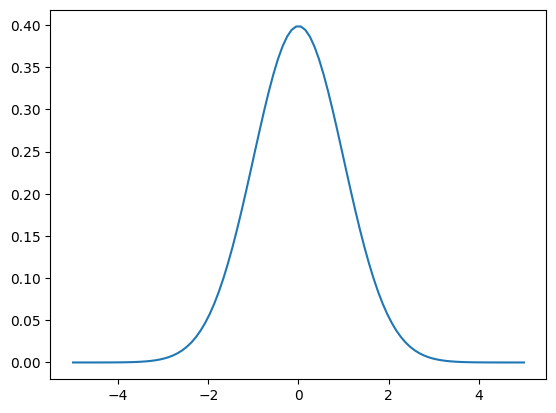

In [39]:
from scipy import stats
gaussian = stats.norm()
x = np.linspace(-5, 5, 100)
plt.plot(x, gaussian.pdf(x))

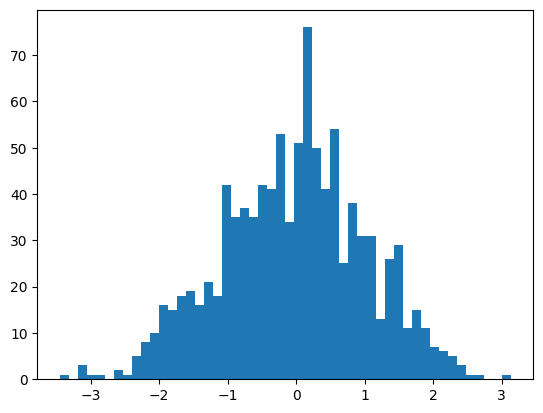

In [66]:
samples = gaussian.rvs(size=1000)
_=plt.hist(samples, bins=50)


In [64]:
mu, sigma = stats.norm.fit(samples)
print(mu, sigma)

-0.001424207411828095 1.0340868439693796


In [67]:
from scipy.optimize import minimize

def objective(samples, mu, sigma):
    return -np.sum(stats.norm.logpdf(samples, loc=mu, scale=sigma))

minimize(fun=objective, x0=samples, args=(0, 1))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 918.9385332070169
        x: [ 2.571e-06  4.745e-07 ...  8.770e-07  4.499e-07]
      nit: 5
      jac: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
 hess_inv: [[ 1.000e+00 -4.873e-04 ...  1.096e-03  1.096e-03]
            [-4.873e-04  1.000e+00 ... -2.500e-04 -2.500e-04]
            ...
            [ 1.096e-03 -2.500e-04 ...  1.001e+00  9.856e-04]
            [ 1.096e-03 -2.500e-04 ...  9.856e-04  1.001e+00]]
     nfev: 8008
     njev: 8

In [99]:
from scipy.stats import normaltest
x = np.random.normal(size=10000)
normaltest(x)
# plt.hist(x, bins=25)

NormaltestResult(statistic=4.576088642728095, pvalue=0.10146470029202549)

In [100]:
from scipy.stats import kstest
x = np.random.uniform(size = 100)
kstest(x, "uniform")

KstestResult(statistic=0.09310501991183978, pvalue=0.330670195006727, statistic_location=0.5531050199118398, statistic_sign=-1)

In [128]:
np.random.choice(10, 3, replace=True)
data = pd.DataFrame(np.arange(24).reshape(12, -1))
centroids = data.sample(3, replace=False)
data - centroids.iloc[1]
np.sum(data ** 2, axis=1)

0        1
1       13
2       41
3       85
4      145
5      221
6      313
7      421
8      545
9      685
10     841
11    1013
dtype: int64

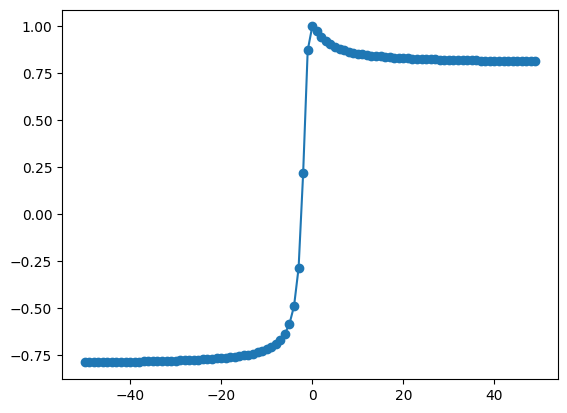

In [190]:
a = np.arange(4) * 1.0
b = np.arange(4) * 100.0 + a
a_tilda = a - np.average(a)
b_tilda = b - np.average(b)

a_tilda = np.arange(4)
b_tilda = a - 3
np.dot(a_tilda, b_tilda) / (np.sqrt(sum(a_tilda ** 2)) * np.sqrt(sum(b_tilda**2)))

result = np.arange(100) - 50

df = pd.DataFrame(result)
df['cos'] = df[0].apply(lambda offset: np.dot(a_tilda, (a_tilda + offset)) / (np.sqrt(sum(a_tilda ** 2)) * np.sqrt(sum((a_tilda + offset)**2))) )
plt.plot(df[0], df['cos'], marker='o')

In [195]:
from scipy.stats import pearsonr
pearsonr(a, b)

PearsonRResult(statistic=1.0, pvalue=0.0)

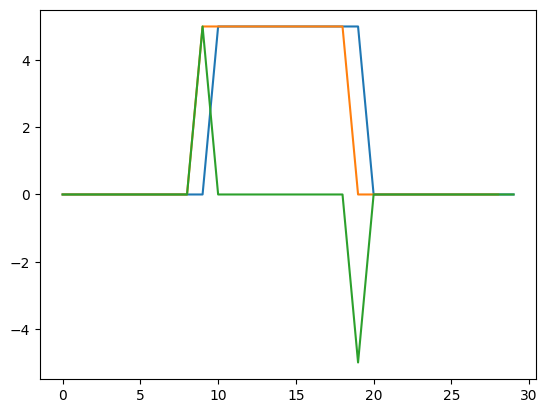

In [228]:
df=pd.DataFrame(np.zeros(30))
df.iloc[10:20] = 5
df[1]=df[0].shift(-1)
kernel = np.array([-1, 1])
df['edge'] = np.sum(df * kernel, axis=1)
plt.plot(df)


In [317]:
# Create a 10x10 numpy array (example data)
array = np.arange(1, 101).reshape(10, 10)

# Switch upper left quadrant with lower right
array[:5, :5], array[5:, 5:] = array[5:, 5:], array[:5, :5].copy()

# Switch upper right with lower left quadrant
array[:5, 5:], array[5:, :5] = array[5:, :5], array[:5, 5:].copy()

# Display the resulting array
print(array)

[[ 56  57  58  59  60  51  52  53  54  55]
 [ 66  67  68  69  70  61  62  63  64  65]
 [ 76  77  78  79  80  71  72  73  74  75]
 [ 86  87  88  89  90  81  82  83  84  85]
 [ 96  97  98  99 100  91  92  93  94  95]
 [  6   7   8   9  10  56  57  58  59  60]
 [ 16  17  18  19  20  66  67  68  69  70]
 [ 26  27  28  29  30  76  77  78  79  80]
 [ 36  37  38  39  40  86  87  88  89  90]
 [ 46  47  48  49  50  96  97  98  99 100]]


In [352]:
A = np.arange(6).reshape(2,3)
np.dot(A.T, A)
V=np.arange(3).reshape(3, 1)
V
np.dot(A, V)


(2, 1)

In [6]:
import numpy as np

# Example dataset: rows are observations, columns are variables
data = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

# Calculate the covariance matrix
cov_matrix = np.cov(data, rowvar=False)

print(cov_matrix)

[[4. 4.]
 [4. 4.]]


In [9]:
import numpy as np

# Define the mean vector
mean_vector = np.array([1, 2])

# Define the covariance matrix
cov_matrix = np.array([[1, 0.5], [0.5, 1]])

# Generate random samples from a multivariate normal distribution
samples = np.random.multivariate_normal(mean_vector, cov_matrix, size=1000)

# Calculate the mean and covariance of the generated samples
sample_mean = np.mean(samples, axis=0)
sample_cov = np.cov(samples, rowvar=False)

print("Sample Mean:\n", sample_mean)
print("Sample Covariance Matrix:\n", sample_cov)
print(samples.shape)

Sample Mean:
 [1.0037452  2.01564617]
Sample Covariance Matrix:
 [[1.01139575 0.48708531]
 [0.48708531 1.02109809]]
(1000, 2)


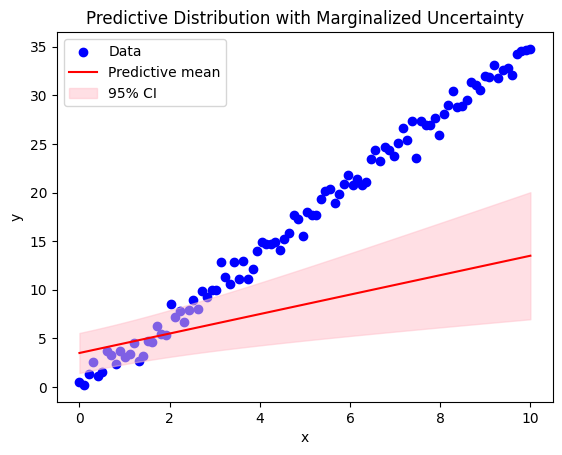

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate some example data
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 3.5 * x + np.random.normal(0, 1, size=x.shape)

# Assume prior distributions for beta_0 and beta_1
prior_mean = np.array([0, 0])
prior_cov = np.array([[10, 0], [0, 10]])

# Assume known variance of the noise
sigma_y = 1.0

# Posterior distribution (for simplicity, assume it is a multivariate normal)
posterior_mean = np.array([3.5, 1.0])  # Use some plausible values for demonstration
posterior_cov = np.array([[0.1, 0], [0, 0.1]])

# Define the predictive distribution
def predictive_distribution(x_star, posterior_mean, posterior_cov, sigma_y):
    beta_0, beta_1 = posterior_mean
    pred_mean = beta_0 + beta_1 * x_star
    pred_var = sigma_y**2 + np.dot([1, x_star], np.dot(posterior_cov, [1, x_star]))
    return pred_mean, np.sqrt(pred_var)

# Generate predictive means and intervals
x_star = np.linspace(0, 10, 100)
pred_means = []
pred_intervals = []

for x_s in x_star:
    mean, std_dev = predictive_distribution(x_s, posterior_mean, posterior_cov, sigma_y)
    pred_means.append(mean)
    pred_intervals.append(1.96 * std_dev)  # 95% confidence interval

pred_means = np.array(pred_means)
pred_intervals = np.array(pred_intervals)

# Plot the results
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_star, pred_means, color='red', label='Predictive mean')
plt.fill_between(x_star, pred_means - pred_intervals, pred_means + pred_intervals, color='pink', alpha=0.5, label='95% CI')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Predictive Distribution with Marginalized Uncertainty')
plt.show()
